In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('../dataset/train.csv')
train_data = train_data[['date', 'id', 'target']]

In [4]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   id      int64         
 2   target  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 98.7 MB


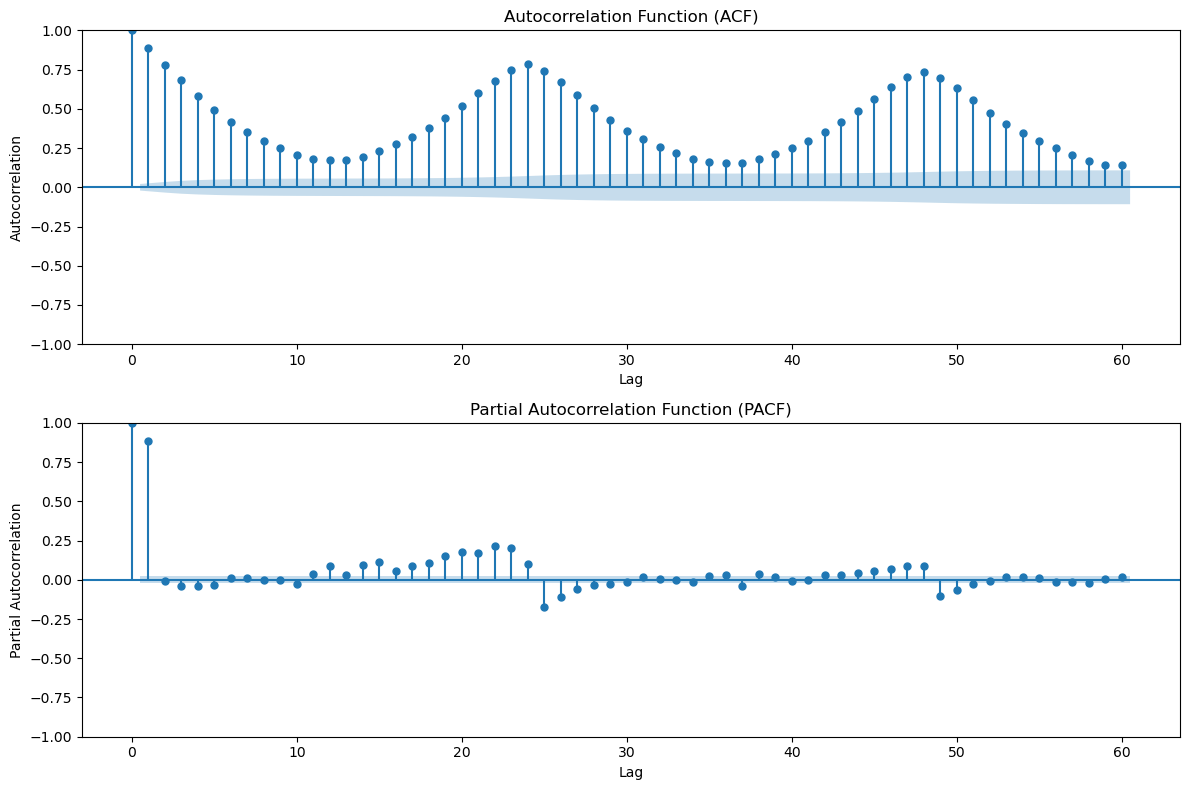

"\nThough the acf function of id-20 is almost sinusoidal with the lags 60, which may indicate strong seasonality, \nthe daily usage line graph drawn in task1, however, doesn't agree the acf.\nBut if de-trend the daily usage of id-20, the result indeed shows the seasonality.\nIn summary, the acf indicates a high order of moving average(MA) model(sinusoidal), \nthe pacf indicates a low order of autoregressive(AR) model(drops significantly even with 2 lags).\n"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF on the first subplot
plot_acf(train_data[train_data['id'] == 20]['target'], lags=60, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Function (ACF)')

# Plot the PACF on the second subplot
plot_pacf(train_data[train_data['id'] == 20]['target'], lags=60, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

"""
Though the acf function of id-20 is almost sinusoidal with the lags 60, which may indicate strong seasonality, 
the daily usage line graph drawn in task1, however, doesn't agree the acf.
But if de-trend the daily usage of id-20, the result indeed shows the seasonality.
In summary, the acf indicates a high order of moving average(MA) model(sinusoidal), 
the pacf indicates a low order of autoregressive(AR) model(drops significantly even with 2 lags).
"""

In [14]:
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller

def check_stationary(id, time_series):
    res = adfuller(time_series.values)
    adf = res[0]
    p_value = res[1]
    critical_values = res[4]
    print(f'adf: {adf: .3f}')
    print(f'p_value: {p_value: .3f}')
    for k, v in critical_values.items():
        print(f'{k} : {v: .3f}')
    if p_value <= 0.05 and critical_values['5%'] > adf:
        print(f'The time series of {id} is stationary')
    else:
        print(f'The time series of {id} is not stationary')
    print('-' * 7)


In [15]:
desired_ids = [0, 1, 17, 20, 35, 41, 51, 67, 88]

for id in desired_ids:
    check_stationary(id, time_series=train_data[train_data['id'] == id]['target'])

adf: -5.573
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 0 is stationary
-------
adf: -7.660
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 1 is stationary
-------
adf: -9.849
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 17 is stationary
-------
adf: -4.775
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 20 is stationary
-------
adf: -6.795
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 35 is stationary
-------
adf: -7.855
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 41 is stationary
-------
adf: -3.799
p_value:  0.003
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 51 is stationary
-------
adf: -10.800
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 67 is stationary
-------
adf: -4.862
p_value:  0.000
1% : -3.431
5% : -2.862
10% : -2.567
The time series of 88 is stationary
-------


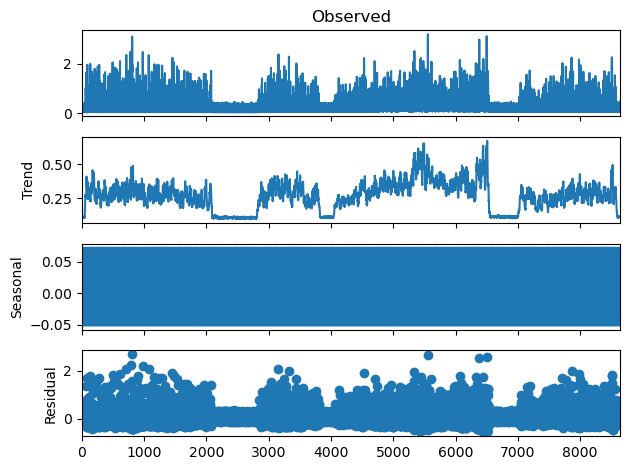

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(train_data[train_data['id'] == desired_ids[1]]['target'].values,
                                      model='additive',
                                      period=30)

decompose_result.plot()
plt.show()

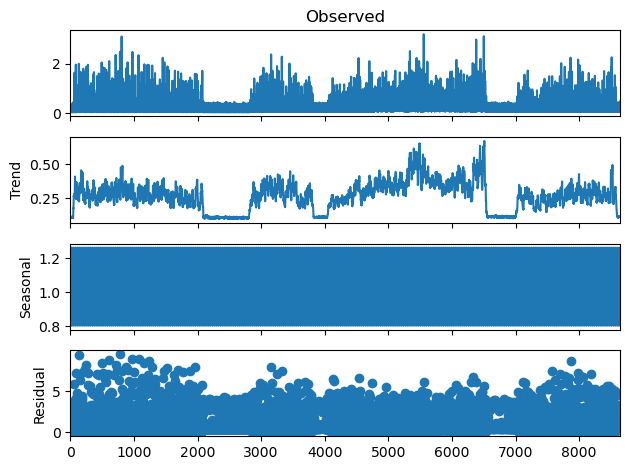

In [19]:
decompose_result = seasonal_decompose(train_data[train_data['id'] == desired_ids[1]]['target'].values,
                                      model='multiplicative',
                                      period=30)

decompose_result.plot()
plt.show()